<a href="https://colab.research.google.com/github/DDias540/Internal-Development-in-QA/blob/master/Wine_DPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.6447 - mae: 3.6487 - val_loss: 2.2914 - val_mae: 1.0995
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5375 - mae: 0.9635 - val_loss: 1.6121 - val_mae: 0.9436
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1750 - mae: 0.8490 - val_loss: 1.2507 - val_mae: 0.8448
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9384 - mae: 0.7568 - val_loss: 0.9625 - val_mae: 0.7422
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7486 - mae: 0.6831 - val_loss: 0.7857 - val_mae: 0.6750
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6470 - mae: 0.6321 - val_loss: 0.6571 - val_mae: 0.6246
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5638 - mae: 0.5817 - val_loss: 0.6025 - val_mae: 0.5926
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5366 - mae: 0.5735 - val_loss: 0.5624 - val_mae: 0.5774
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5257

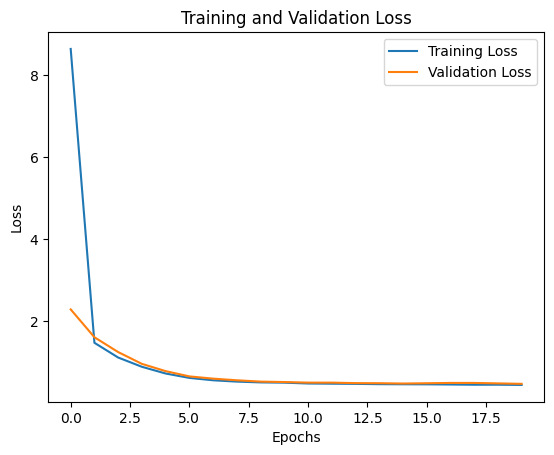

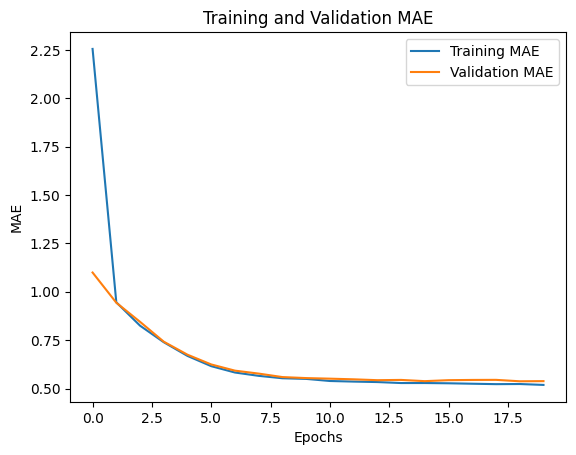

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4641 - mae: 0.5353 
Test MAE: 0.5384133458137512
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [7]:
# Bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Carregar os dados
# Carregar os arquivos CSV
from google.colab import files
uploaded = files.upload()

# Carregar os arquivos CSV em dataframes
import io
red_wine_data = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep=';')
white_wine_data = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep=';')

# Adicionar coluna de identificação do tipo de vinho e concatenar os dados
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'
wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Exploração básica dos dados
print(wine_data.info())
print(wine_data.describe())

# Preparação dos dados
X = wine_data.drop(['quality', 'wine_type'], axis=1)  # Características
y = wine_data['quality']  # Variável alvo

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção da rede neural
model = Sequential()
model.add(Dense(64, input_shape=(11,), activation='relu'))  # Camada de entrada + oculta 1
model.add(Dense(32, activation='relu'))  # Camada oculta 2
model.add(Dense(1, activation='linear'))  # Camada de saída (regressão)

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32)

# Avaliação do modelo
# Gráfico da perda e erro durante o treinamento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Avaliar no conjunto de teste
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')

# 9. Previsões
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)